In [1]:
pip install category_encoders


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# STANDARD LIBRARIES
import os
import warnings
warnings.filterwarnings("ignore")

# THIRD PARTY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import scipy.stats as stats
import category_encoders as ce

#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr



# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
import matplotlib
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from math import sqrt

In [3]:
import acquire 
import prepare

In [4]:
df = acquire.get_fifa_data()

In [5]:
df = prepare.prepped_data(df)

Before dropping nulls, 142079 rows, 111 cols
After dropping nulls. 131489 rows. 66 cols
After cleaning the data and adding additional columns there are: 98804 rows. 83 cols


In [6]:
goalkeeper_df, forward_df, midfielder_df, defender_df = prepare.acquire_players_by_position(df)

# Step 1: Assign all player positions to a dataframe

In [ ]:
#GK
goalkeepers = df[(df.club_position == 'GK')]

In [ ]:
goalkeepers.shape

In [ ]:
#ST, RS, LS, LW, RW, LF, CF
forwards = df[(df.club_position == 'ST') | (df.club_position == 'RS') | (df.club_position == 'LS') | (df.club_position == 'LW') | (df.club_position == 'RW') | (df.club_position == 'LF') | (df.club_position == 'CF')]


In [ ]:
forwards.shape

In [ ]:
#LCM, RCM, RM, LM, CAM, LDM, RDM, CDM, LAM, RAM 
midfielders = df[(df.club_position == 'LCM') | (df.club_position == 'RCM') | (df.club_position == 'RM') | (df.club_position == 'LM') | (df.club_position == 'CAM') | (df.club_position == 'LDM') | (df.club_position == 'RDM') | (df.club_position == 'CDM') | (df.club_position == 'LAM') | (df.club_position == 'RAM')] 


In [ ]:
midfielders.shape

In [ ]:
#RCB, LCB, LB, RB, CB, RWB, LWB
defenders = df[(df.club_position == 'RCB') | (df.club_position == 'LCB') | (df.club_position == 'LB') | (df.club_position == 'RB') | (df.club_position == 'CB') | (df.club_position == 'RWB') | (df.club_position == 'LWB')]

In [ ]:
defenders.shape

In [ ]:
reserve = df[df.club_position == 'RES']


In [ ]:
reserve.shape

In [ ]:
substitute = df[df.club_position == 'SUB']

In [ ]:
substitute.shape

In [ ]:
df.shape

# Step 2: Separate RESERVE Player dataframe by player position

In [ ]:
reserve.shape

In [ ]:
reserve['player_positions'] = reserve['player_positions'].str.split(',').str[0]

In [ ]:
df_reserve_goalkeepers = reserve[reserve.player_positions == 'GK']

In [ ]:
df_reserve_goalkeepers.shape

In [ ]:
#ST, RS, LS, LW, RW, LF, CF
df_reserve_forwards = reserve[(reserve.player_positions == 'ST') | (reserve.player_positions == 'RW') | (reserve.player_positions == 'LW') | (reserve.player_positions == 'CF')]

In [ ]:
df_reserve_forwards.shape

In [ ]:
#LCM, RCM, RM, LM, CAM, LDM, RDM, CDM, LAM, RAM 
df_reserve_midfielders = reserve[(reserve.player_positions == 'CM') | (reserve.player_positions == 'CDM') | (reserve.player_positions == 'CAM') | (reserve.player_positions == 'RM') | (reserve.player_positions == 'LM')]

In [ ]:
df_reserve_midfielders.shape

In [ ]:
#RCB, LCB, LB, RB, CB, RWB, LWB
df_reserve_defenders = reserve[(reserve.player_positions == 'CB') | (reserve.player_positions == 'LB') | (reserve.player_positions == 'RB') | (reserve.player_positions == 'LWB') | (reserve.player_positions == 'RWB')]

In [ ]:
df_reserve_defenders.shape

# Step 3: Separate SUBSTITUTE Player dataframe by player position

In [ ]:
substitute.shape

In [ ]:
substitute['player_positions'] = substitute['player_positions'].str.split(',').str[0]


In [ ]:
df_substitute_goalkeeper = substitute[substitute.player_positions == 'GK']

In [ ]:
df_substitute_goalkeeper.shape

In [ ]:
df_substitute_forward = substitute[(substitute.player_positions == 'ST') | (substitute.player_positions == 'RW') | (substitute.player_positions == 'LW') | (substitute.player_positions == 'CF')]

In [ ]:
df_substitute_forward.shape

In [ ]:
df_substitute_midfielders = substitute[(substitute.player_positions == 'CM') | (substitute.player_positions == 'CDM') | (substitute.player_positions == 'CAM') | (substitute.player_positions == 'LM') | (substitute.player_positions == 'RM')]

In [ ]:
df_substitute_midfielders.shape

In [ ]:
df_substitute_defenders = substitute[(substitute.player_positions == 'CB') | (substitute.player_positions == 'LB') | (substitute.player_positions == 'RB') | (substitute.player_positions == 'RWB') | (substitute.player_positions == 'LWB')]

In [ ]:
df_substitute_defenders.shape

# Step 4: Concat Dataframes together 


In [ ]:
goalkeeper_df = pd.concat([goalkeepers, df_substitute_goalkeeper, df_reserve_goalkeepers], axis=0)

In [ ]:
forward_df = pd.concat([forwards, df_substitute_forward, df_reserve_forwards], axis=0)

In [ ]:
midfielder_df = pd.concat([midfielders, df_substitute_midfielders, df_reserve_midfielders], axis=0)

In [ ]:
defender_df = pd.concat([defenders, df_substitute_defenders, df_reserve_defenders], axis=0)

# Step 5: Correlation for each position

In [ ]:
goalkeeper_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(17)

In [ ]:
forward_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

In [ ]:
midfielder_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

In [ ]:
defender_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(15)

# Clusters based on Correlation

_Prepare the Data_

In [8]:
#split
train, validate, test = prepare.split(goalkeeper_df)

Train: 6779 rows, 83 cols
Validate: 2969 rows, 83 cols
Test: 1619 rows, 83 cols


In [9]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

_Encode categorical variables_ 

In [10]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(6779, 80)

In [11]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(6779, 80)

In [12]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

,sofifa_id,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_team_id,club_name,...,league_yr_sum,club_name_yr_sum,seniority,club_position_encoded,work_rate_encoded,preferred_foot_encoded,age_bins_encoded,weight_bins_encoded,body_type_encoded,league_encoded
count,"6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00",...,"6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00"
mean,-0.28,0.62,-0.90,0.06,0.01,0.03,-0.01,0.03,0.40,0.49,...,0.55,0.59,0.40,-0.02,0.00,-0.10,0.29,467.16,0.06,0.22
std,0.98,2.27,2.74,0.74,0.69,0.69,0.79,0.78,0.48,1.31,...,1.30,1.66,0.90,0.86,0.00,0.30,0.45,"1,691.53",1.35,0.81
min,-4.67,-0.77,-37.00,-1.73,-2.20,-1.25,-3.83,-3.00,-0.02,-0.46,...,-0.56,-0.40,-0.33,-1.00,0.00,-1.00,-0.01,"-5,906.01",-3.00,-0.71
25%,-0.62,-0.54,-0.75,-0.45,-0.50,-0.50,-0.50,-0.50,-0.01,-0.26,...,-0.34,-0.22,-0.33,-1.00,0.00,0.00,-0.00,-0.71,0.00,-0.36
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.38,0.46,0.25,0.55,0.50,0.50,0.50,0.50,0.99,0.74,...,0.66,0.78,0.67,0.00,0.00,0.00,1.00,0.29,0.00,0.64
max,0.83,27.82,0.44,2.55,2.50,2.38,3.33,3.50,1.01,8.72,...,4.63,12.79,8.67,1.43,0.00,0.00,1.00,"4,359.85",6.00,2.64


# Goalkeeper Clusters

#### ANOVA test on gk_handling, gk_diving, gk_reflexes

In [13]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['gk_handling', 'gk_diving', 'gk_reflexes']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [14]:
train['clusters'] = kmeans.predict(X)

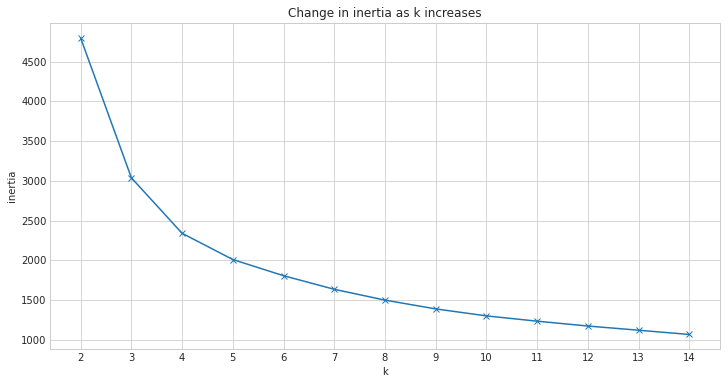

In [15]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [16]:
#look at median of clusters 
train.groupby('clusters')[ 'gk_handling', 'gk_diving', 'gk_reflexes'].median()

,gk_handling,gk_diving,gk_reflexes
clusters,,,
0,60.00,63.00,64.00
1,53.00,56.00,56.00
2,75.00,78.00,80.00
3,67.00,70.00,71.00


In [17]:
#look at mean of clusters 
train.groupby('clusters')[ 'gk_handling', 'gk_diving', 'gk_reflexes'].mean()

,gk_handling,gk_diving,gk_reflexes
clusters,,,
0,60.20,63.03,63.85
1,52.53,55.37,55.65
2,75.44,78.53,79.93
3,66.95,69.84,71.35


In [18]:
#create dataframe that includes wage 
testing = pd.concat([train[['clusters', 'gk_handling', 'gk_diving', 'gk_reflexes']], y_train], axis = 1)
testing

,clusters,gk_handling,gk_diving,gk_reflexes,wage_eur
214,2,79,85,87,"180,000.00"
454,2,75,76,76,"50,000.00"
687,2,71,78,83,"80,000.00"
914,2,81,77,90,"80,000.00"
1121,2,78,83,82,"130,000.00"
...,...,...,...,...,...
93415,1,54,56,54,"1,000.00"
93596,1,61,59,52,500.00
94075,1,45,53,58,500.00
94349,1,56,58,58,500.00


In [19]:
#groupby to be able to compare the wages per cluster
testing.groupby('clusters')[ 'gk_handling', 'gk_diving', 'gk_reflexes', 'wage_eur'].mean()

,gk_handling,gk_diving,gk_reflexes,wage_eur
clusters,,,,
0,60.20,63.03,63.85,"3,049.46"
1,52.53,55.37,55.65,"1,551.54"
2,75.44,78.53,79.93,"45,306.72"
3,66.95,69.84,71.35,"10,260.90"


In [20]:
# testing2 = pd.concat([X_train_scaled_df[['clusters', 'gk_handling', 'gk_diving', 'gk_reflexes']], y_train], axis = 1)
# testing2

In [21]:
train1 = train[['gk_handling', 'gk_diving', 'gk_reflexes', 'overall']].copy()

In [22]:
validate1 = validate[['gk_handling', 'gk_diving', 'gk_reflexes', 'overall']].copy()

In [ ]:
train.clusters1

1. clusters in the validate dataframe
2. clusters in the test dataframe
3. creating a dataframe with the features that you want

# Create Baseline

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Imported Function to create baseline 

In [24]:
def create_baseline(y_train, y_validate, target):
    '''
    Take in y_train and y_validate dataframe and target variable(wage_euro). 
    Calculate the mean and median of the target variable and print the result side by side comparison
    Select the one that has the lowest RMSE
    Append into a dataframe called metric_df
    '''
    #wage_euro_value mean
    wage_euro_pred_mean = y_train[target].mean()
    y_train['wage_euro_pred_mean'] = wage_euro_pred_mean
    y_validate['wage_euro_pred_mean'] = wage_euro_pred_mean

    #wage_euro_value_median
    wage_euro_pred_median = y_train[target].median()
    y_train['wage_euro_pred_median'] = wage_euro_pred_median
    y_validate['wage_euro_pred_median'] = wage_euro_pred_median


    #RMSE of wage_euro_value_pred_mean
    rmse_mean_train = mean_squared_error(y_train[target], y_train.wage_euro_pred_mean)**(1/2)
    rmse_mean_validate = mean_squared_error(y_validate[target], y_validate.wage_euro_pred_mean)**(1/2)


    #RMSE of wage_euro_value_pred_median
    rmse_median_train = mean_squared_error(y_train[target], y_train.wage_euro_pred_median)**(1/2)
    rmse_median_validate = mean_squared_error(y_validate[target], y_validate.wage_euro_pred_median)**(1/2)

    #R2 score for the baseline
    r2_baseline = r2_score(y_validate[target], y_validate.wage_euro_pred_mean)

    #Append rmse validate and r2 score into a dataframe
    metric_df = pd.DataFrame(data=[{
    'model': 'Mean Baseline',
    'rmse_train': rmse_mean_train,
    'rmse_validate': rmse_mean_validate,
    'r^2_value': r2_baseline}])

    return  metric_df, rmse_mean_train, rmse_mean_validate, rmse_median_train, rmse_median_validate, r2_baseline

In [25]:
target = 'wage_eur'
#create baseline
metric_df, rmse_mean_train, rmse_mean_validate, rmse_median_train, rmse_median_validate, r2_baseline = create_baseline(y_train, y_validate, target)


In [26]:
metric_df

,model,rmse_train,rmse_validate,r^2_value
0,Mean Baseline,"21,917.17","18,979.66",-0.03


# Imported Functions for Models 

In [27]:
def create_model(model, X_train, X_validate, y_train, y_validate, target):
    '''
    Function takes in X_train df and target df (wage_eur), and
    type of model (LinearRegression, LassoLars, TweedieRegressor) and
    calculates the mean squared error and the r2 score
    Finally, returns mean squared error and the r2 score
    '''
    #fit the model to our training data, specify column since it is a dataframe
    model.fit(X_train,y_train[target])

    #predict train
    y_train['wage_euro_pred_lm'] = model.predict(X_train)
    y_train['wage_euro_pred_lars'] = model.predict(X_train)
    y_train['wage_euro_pred_glm'] = model.predict(X_train)

    #evaluate the RMSE for train
    rmse_train = mean_squared_error(y_train[target], y_train.wage_euro_pred_lm)**(1/2)
    rmse_train = mean_squared_error(y_train[target], y_train.wage_euro_pred_lars)**(1/2)
    rmse_train = mean_squared_error(y_train[target], y_train.wage_euro_pred_glm)**(1/2)

    #predict validate
    y_validate['wage_euro_pred_lm'] = model.predict(X_validate)
    y_validate['wage_euro_pred_lars'] = model.predict(X_validate)
    y_validate['wage_euro_pred_glm'] = model.predict(X_validate)
   
    #evaluate the RMSE for validate
    rmse_validate = mean_squared_error(y_validate[target], y_validate.wage_euro_pred_lm)**(1/2)
    rmse_validate = mean_squared_error(y_validate[target], y_validate.wage_euro_pred_lars)**(1/2)
    rmse_validate = mean_squared_error(y_validate[target], y_validate.wage_euro_pred_glm)**(1/2)

    #r2 score for model
    r2_model_score = r2_score(y_validate[target], y_validate.wage_euro_pred_lm)
    r2_model_score = r2_score(y_validate[target], y_validate.wage_euro_pred_lars)
    r2_model_score = r2_score(y_validate[target], y_validate.wage_euro_pred_glm)

    return rmse_train, rmse_validate, r2_model_score

In [28]:
#Linear regression model
rmse_lm_train, rmse_lm_validate, r2_lm_value = create_model(LinearRegression(normalize=True), train1, validate1, y_train, y_validate, 'wage_eur')

#Lassorlars model
rmse_lars_train, rmse_lars_validate, r2_lars_value = create_model(LassoLars(alpha=1.0), train1, validate1, y_train, y_validate, 'wage_eur')

#Tweedie regressor model
rmse_glm_train, rmse_glm_validate, r2_glm_value = create_model(TweedieRegressor(power =0, alpha=0.00), train1, validate1, y_train, y_validate, 'wage_eur')

In [29]:
# add model's performance to metric df
metric_df = metric_df.append({
    'model': 'Linear_regression',
    'rmse_train': rmse_lm_train,
    'rmse_validate': rmse_lm_validate,
    'r^2_value': r2_lm_value}, ignore_index=True)

metric_df = metric_df.append({
    'model': 'Lassolars',
    'rmse_train': rmse_lars_train,
    'rmse_validate': rmse_lars_validate,
    'r^2_value': r2_lars_value}, ignore_index=True)

metric_df = metric_df.append({
    'model': 'Tweedie_regressor',
    'rmse_train': rmse_glm_train,
    'rmse_validate': rmse_glm_validate,
    'r^2_value': r2_glm_value}, ignore_index=True)


In [30]:
def report(metric_df):
    '''
    This funtion will take in a dataframe and convert to a html and passed to the display function, 
    it will result in dataframe being displayed in the frontend (only works in the notebook).
    '''
    
    from IPython.display import display, HTML
    rmse_base = metric_df.iloc[0,2]
    print(f'These are the models that perform better than our baseline rmse: {rmse_base}')
    dfs =metric_df[['model', 'rmse_validate']][metric_df['rmse_validate'] < rmse_base]
    display(HTML(dfs.to_html()))
    
    
    min_val = metric_df['rmse_validate'].idxmin()
    metric_df.iloc[min_val][0]
    rsme_bet = round(metric_df['rmse_validate'].iloc[min_val], 6)
    print('-----------------------------------------------------------------------------------------------')
    print(f'   ********** The model with the less  rmse_validate  is {metric_df.iloc[min_val][0] }  rmse:{rsme_bet} **********             ')
    print('-----------------------------------------------------------------------------------------------')
    print(' ')
    min_val = metric_df['r^2_value'].idxmax()
    metric_df.iloc[min_val][0]
    print(f'The model with r^2 validate closer to 1 is ', metric_df.iloc[min_val][0])
    
    display(HTML(metric_df.to_html()))
    return

In [31]:
report(metric_df)

These are the models that perform better than our baseline rmse: 18979.65667364599


,model,rmse_validate
1,Linear_regression,"15,687.56"
2,Lassolars,"15,675.02"
3,Tweedie_regressor,"15,687.56"


-----------------------------------------------------------------------------------------------
   ********** The model with the less  rmse_validate  is Lassolars  rmse:15675.023291 **********             
-----------------------------------------------------------------------------------------------
 
The model with r^2 validate closer to 1 is  Lassolars


,model,rmse_train,rmse_validate,r^2_value
0,Mean Baseline,"21,917.17","18,979.66",-0.03
1,Linear_regression,"16,728.62","15,687.56",0.29
2,Lassolars,"16,728.87","15,675.02",0.30
3,Tweedie_regressor,"16,728.62","15,687.56",0.29


#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [ ]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

# Prepare Forwards

In [ ]:
#split
train, validate, test = prepare.split(forward_df)

In [ ]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [ ]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

In [ ]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# FORWARD CLUSTERS

#### ANOVA test on ball_control, reactions, dribbling

In [ ]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['ball_control', 'reactions', 'dribbling']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

In [ ]:
train['clusters'] = kmeans.predict(X)

In [ ]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'dribbling'].median()

#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [ ]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

# Prepare Midfielders

In [ ]:
#split
train, validate, test = prepare.split(midfielder_df)

In [ ]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [ ]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

In [ ]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Midfielder Cluster

#### ANOVA test on ball_control, reactions, passing

In [ ]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['ball_control', 'reactions', 'passing']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

In [ ]:
train['clusters'] = kmeans.predict(X)

In [ ]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'passing'].median()

#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [ ]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

# Prepare Defenders

In [ ]:
#split
train, validate, test = prepare.split(defender_df)

In [ ]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [ ]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

In [ ]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Defender Clusters 

#### ANOVA test on marking, potential, short_passing

In [ ]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['marking', 'potential', 'short_passing']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

In [ ]:
train['clusters'] = kmeans.predict(X)

In [ ]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'passing'].median()

#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [ ]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")